In [2]:
import sys
sys.path.append('/Users/jp/Desktop/Investment/trading_BOT/macd_long_backtester')
from macd_long_backtester import Macd_long_backtester
import pandas as pd
import matplotlib.pyplot as plt

### Calculating interval for subperiods

In [3]:
macd_td = Macd_long_backtester(symbol='BTCUSDT')

In [4]:
macd_td.prepare_data(start='2016-01-29-20:00', end='2023-09-11-20:00', interval='1d')

1859


In [5]:
mindate = macd_td.data_init.index[0]

In [6]:
maxdate = macd_td.data_init.index[-1]

In [7]:
total_days = maxdate - mindate
total_days

Timedelta('1858 days 00:00:00')

In [8]:
total_subperiod = total_days/3
total_subperiod

Timedelta('619 days 08:00:00')

In [9]:
subperiod1 = (mindate, mindate + total_subperiod)
subperiod1

(Timestamp('2017-08-17 00:00:00'), Timestamp('2019-04-28 08:00:00'))

In [10]:
subperiod2 = (mindate + total_subperiod, mindate + total_subperiod*2)
subperiod2

(Timestamp('2019-04-28 08:00:00'), Timestamp('2021-01-06 16:00:00'))

In [11]:
subperiod3 = (mindate + total_subperiod*2, mindate + total_subperiod*3)
subperiod3

(Timestamp('2021-01-06 16:00:00'), Timestamp('2022-09-18 00:00:00'))

### Running optimization for subperiod1

In [12]:
macd_subperiod1 = Macd_long_backtester('BTCUSDT')

In [12]:
subperiod1

(Timestamp('2017-08-17 00:00:00'), Timestamp('2019-04-28 08:00:00'))

In [13]:
# macd_subperiod1.execute_opt(start_opt='2017-08-17-00:00', end_opt='2019-04-28-00:00', interval_opt=('4h', '1d', '1w'), ema_fast_opt=(3,20,1), ema_slow_opt=(5,40,1), ema_sign_opt=(3,40,1), int_for_max='4h', type_trend='paper_method', trend_ref='subperiod1')

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
# macd_subperiod1.opt_results.info()

In [17]:
# macd_subperiod1.opt_results[macd_subperiod1.opt_results.multiple_macd_strategy == macd_subperiod1.opt_results.multiple_macd_strategy.max()]

In [18]:
# macd_subperiod1.data_init.Close.plot(figsize=(15,10))

### Implementing parameters obtained in opt of subperiod1 in subperiod 2: the problem is that subperiod2 has a very big part that is uptrend.

In [19]:
macd_subperiod2 = Macd_long_backtester('BTCUSDT')

In [20]:
macd_subperiod2.prepare_data(start='2019-04-28-00:00', end='2021-01-06-00:00', interval='1w')

89


In [21]:
macd_subperiod2.execute_backtest(ema_fast=15, ema_slow=20, ema_signal=2)

   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0       6.605355           7.830414          1.883718           4.156893   

   multiple_macd_strategy  ann_log_mean_macd  ann_log_std_macd  \
0                4.979283           6.658288          1.111594   

   sharpe_ratio_macd  multiple_macd_strategy_net  ann_log_mean_macd_net  \
0           5.989856                    4.958159               6.640655   

   ann_log_std_macd_net  sharpe_ratio_macd_net  
0              1.112807               5.967479  


(6.605354922934683,
 7.8304141510090775,
 1.8837179623911307,
 4.156893073881083,
 4.97928326031077,
 6.658288344566568,
 1.1115940269610827,
 5.9898561732733,
 4.95815911210098,
 6.640654564297892,
 1.1128072949063395,
 5.967479360257796)

<AxesSubplot:xlabel='Date'>

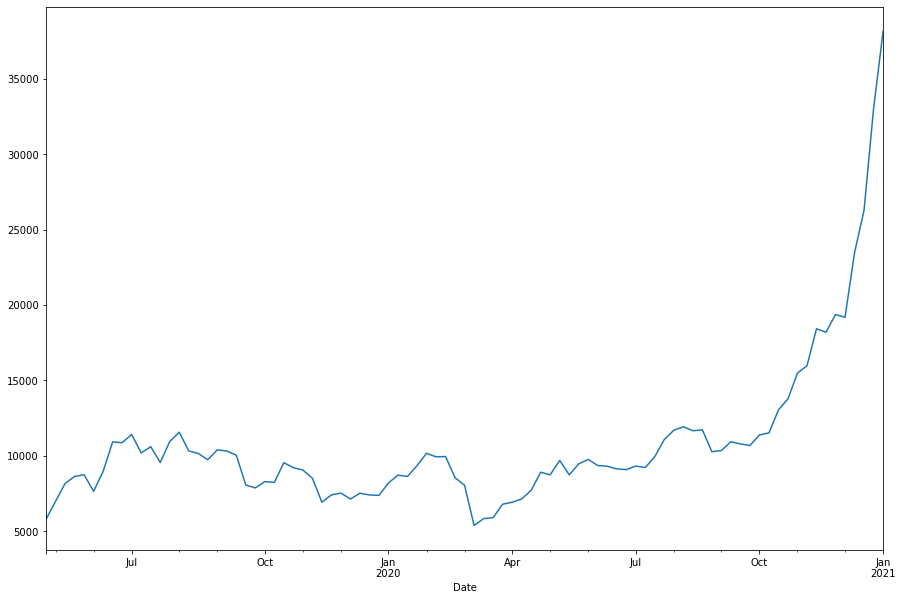

In [22]:
macd_subperiod2.data_init.Close.plot(figsize=(15,10))

In [23]:
macd_subperiod3 = Macd_long_backtester('BTCUSDT')

In [28]:
macd_subperiod3.prepare_data(start='2021-01-06-00:00', end='2022-09-17-00:00', interval='1d')

619


In [29]:
macd_subperiod3.execute_backtest(ema_fast=15, ema_slow=20, ema_signal=2)

   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0       0.538582          -0.365482          0.758419            -0.4819   

   multiple_macd_strategy  ann_log_mean_macd  ann_log_std_macd  \
0                0.711727          -0.200845          0.502173   

   sharpe_ratio_macd  multiple_macd_strategy_net  ann_log_mean_macd_net  \
0          -0.399953                    0.657055              -0.248051   

   ann_log_std_macd_net  sharpe_ratio_macd_net  
0               0.50399              -0.492175  


(0.5385815798806386,
 -0.3654821184526284,
 0.758419220800836,
 -0.48189986280504027,
 0.7117266842882477,
 -0.20084527306126207,
 0.5021726741456906,
 -0.399952612720207,
 0.6570545517204628,
 -0.24805130231125763,
 0.5039900945593395,
 -0.4921749553989542)

<AxesSubplot:xlabel='Date'>

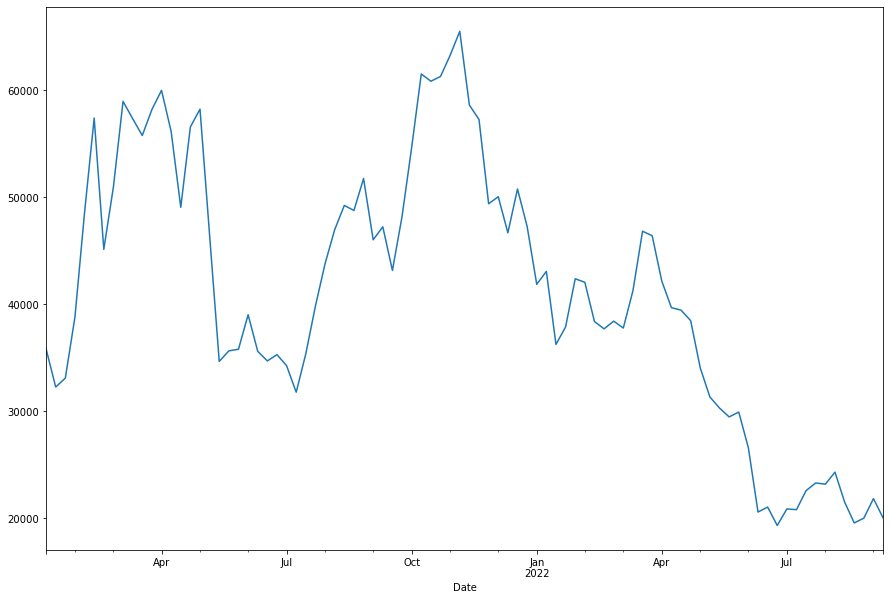

In [27]:
macd_subperiod3.data_init.Close.plot(figsize=(15,10))